In [1]:
import pandas as pd
import numpy as np
from sqlite3 import connect
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
athelets_dataset = pd.read_csv("athlete_events.csv")

In [3]:
athelets_dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
athelets_dataset['NOC'] = athelets_dataset['NOC'].astype(str)
athelets_dataset['Medal'] = athelets_dataset['Medal'].astype(str)
athelets_dataset['Sex'] = athelets_dataset['Sex'].astype(str)
athelets_dataset.dropna(inplace=True)

In [5]:
countries_dataset = pd.read_csv("noc_regions.csv")

In [6]:
countries_dataset.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
conn = connect(':memory:')
athelets_dataset.to_sql('a_data',conn)

In [8]:
pd.read_sql('SELECT * FROM a_data LIMIT 5',conn)

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
2,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,nan
3,5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",nan
4,6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,nan


In [9]:
height = pd.read_sql('SELECT `Height` FROM a_data',conn)

In [10]:
height = height.dropna()

In [11]:
height.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 206164
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Height  206165 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


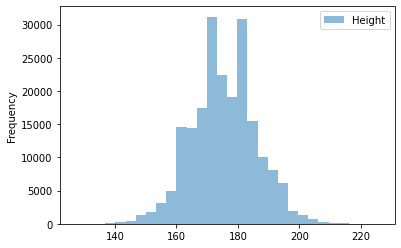

In [12]:
ax = height.plot.hist(bins=30, alpha=0.5)

In [13]:
a_data = pd.read_sql("SELECT * FROM a_data",conn)

In [14]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206165 entries, 0 to 206164
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   206165 non-null  int64  
 1   ID      206165 non-null  int64  
 2   Name    206165 non-null  object 
 3   Sex     206165 non-null  object 
 4   Age     206165 non-null  float64
 5   Height  206165 non-null  float64
 6   Weight  206165 non-null  float64
 7   Team    206165 non-null  object 
 8   NOC     206165 non-null  object 
 9   Games   206165 non-null  object 
 10  Year    206165 non-null  int64  
 11  Season  206165 non-null  object 
 12  City    206165 non-null  object 
 13  Sport   206165 non-null  object 
 14  Event   206165 non-null  object 
 15  Medal   206165 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 25.2+ MB


In [15]:
gender_gold = pd.read_sql("""
                            SELECT Sex, COUNT(Medal) as Total_Gold
                              From a_data
                              Where Medal = 'Gold'
                              Group By Sex
                            """,conn)

In [16]:
gender_gold

,Sex,Total_Gold
0,F,3437
1,M,6730


In [17]:
gender_silver = pd.read_sql("""
                            SELECT Sex, COUNT(Medal) as Total_Silver
                              From a_data
                              Where Medal = 'Silver'
                              Group By Sex
                            """,conn)

In [18]:
gender_silver

,Sex,Total_Silver
0,F,3438
1,M,6428


In [19]:
gender_bronze = pd.read_sql("""
                            SELECT Sex, COUNT(Medal) as Total_Bronze
                              From a_data
                              Where Medal = 'Bronze'
                              Group By Sex
                            """,conn)

In [20]:
gender_bronze

,Sex,Total_Bronze
0,F,3475
1,M,6673


In [21]:
country_medal = athelets_dataset.groupby('NOC')['Medal'].count().sort_values(ascending=False)

<AxesSubplot:xlabel='NOC'>

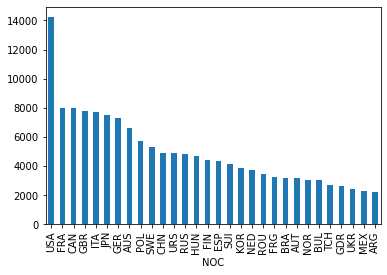

In [22]:
country_medal_30 = country_medal[:30]
country_medal_30.plot(kind='bar')

In [23]:
athelets_dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,nan
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",nan
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,nan


In [24]:
year = athelets_dataset['Year']
year = year.sort_values()
year

76564     1896
32334     1896
76565     1896
44063     1896
76563     1896
          ... 
46576     2016
46577     2016
135313    2016
46548     2016
177722    2016
Name: Year, Length: 206165, dtype: int64

In [25]:
mean_data = athelets_dataset.groupby('Year').mean()
Height_mean = mean_data['Height']
Age_mean = mean_data['Age']
Weight_mean = mean_data['Weight']

<AxesSubplot:title={'center':'Mean height vs. Year'}, xlabel='Year', ylabel='Mean Height'>

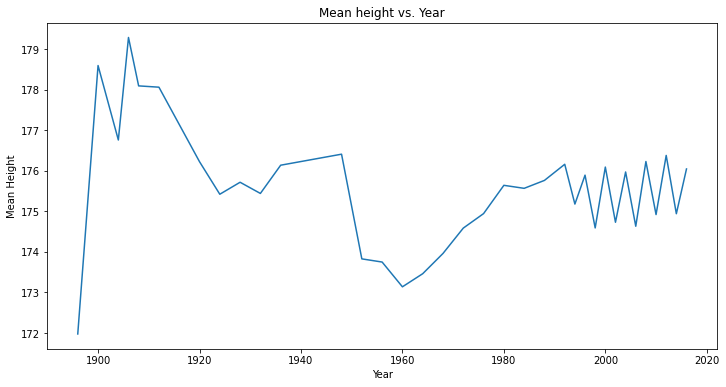

In [26]:
Height_mean.plot(kind='line',xlabel='Year', ylabel='Mean Height',figsize=(12,6),title='Mean height vs. Year')

<AxesSubplot:title={'center':'Mean age vs. Year'}, xlabel='Year', ylabel='Mean Age'>

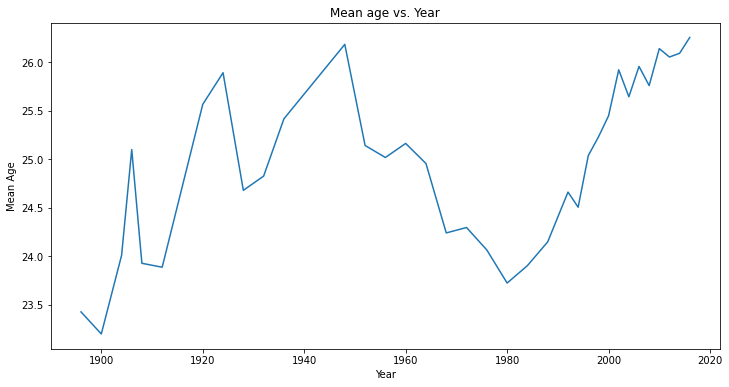

In [27]:
Age_mean.plot(kind='line',xlabel='Year', ylabel='Mean Age',figsize=(12,6), title='Mean age vs. Year')

<AxesSubplot:title={'center':'Mean weight vs. Year'}, xlabel='Year', ylabel='Mean Weight'>

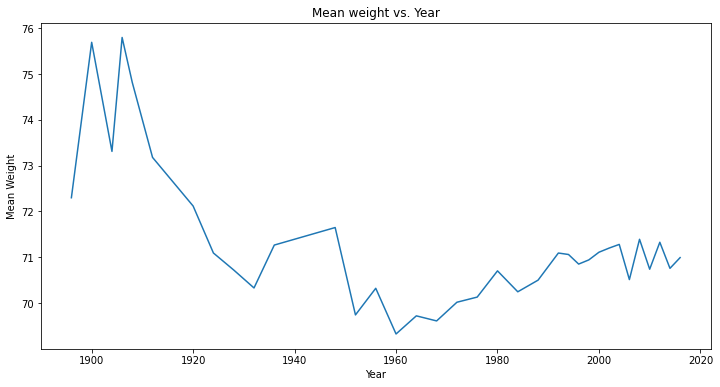

In [28]:
Weight_mean.plot(kind='line',xlabel='Year', ylabel='Mean Weight',figsize=(12,6), title='Mean weight vs. Year')

In [29]:
noc_data = athelets_dataset.groupby(['Year','NOC']).agg({'Medal':['count']})

In [30]:
athelets_dataset['NOC'].unique()

array(['CHN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA', 'ESP',
       'EGY', 'BUL', 'ITA', 'AZE', 'RUS', 'ARG', 'CUB', 'BLR', 'GRE',
       'CMR', 'MEX', 'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN',
       'PAK', 'IRQ', 'LIB', 'QAT', 'MAS', 'IRI', 'CAN', 'IRL', 'AUS',
       'RSA', 'MAR', 'ERI', 'TAN', 'JOR', 'SUD', 'TUN', 'LBA', 'BEL',
       'DJI', 'COM', 'KAZ', 'BRU', 'KSA', 'MDV', 'ETH', 'INA', 'PHI',
       'UZB', 'UAE', 'KGZ', 'TJK', 'EUN', 'JPN', 'BRA', 'FRG', 'GDR',
       'GER', 'ISR', 'SWE', 'ISV', 'TUR', 'SRI', 'ARM', 'CIV', 'KEN',
       'BEN', 'UKR', 'GHA', 'SOM', 'LAT', 'SYR', 'GBR', 'CHI', 'SUI',
       'IND', 'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'CRO', 'GUY', 'POR',
       'ANG', 'VEN', 'COL', 'BAN', 'PLE', 'PER', 'URU', 'PUR', 'UGA',
       'NZL', 'HON', 'ECU', 'TKM', 'MRI', 'TCH', 'SEY', 'MTN', 'CZE',
       'NIG', 'SKN', 'TTO', 'DOM', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL',
       'PLW', 'LTU', 'MON', 'TOG', 'NAM', 'AHO', 'ISL', 'ASA', 'AUT',
       'SAM', 'RWA',

In [31]:
country_medal = country_medal.reset_index()

In [32]:
country_medal

,NOC,Medal
0,USA,14214
1,FRA,7977
2,CAN,7965
3,GBR,7766
4,ITA,7697
...,...,...
221,SAA,3
222,SSD,3
223,YMD,2
224,NFL,1


In [33]:
athelets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      206165 non-null  int64  
 1   Name    206165 non-null  object 
 2   Sex     206165 non-null  object 
 3   Age     206165 non-null  float64
 4   Height  206165 non-null  float64
 5   Weight  206165 non-null  float64
 6   Team    206165 non-null  object 
 7   NOC     206165 non-null  object 
 8   Games   206165 non-null  object 
 9   Year    206165 non-null  int64  
 10  Season  206165 non-null  object 
 11  City    206165 non-null  object 
 12  Sport   206165 non-null  object 
 13  Event   206165 non-null  object 
 14  Medal   206165 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 25.2+ MB


In [34]:
top_30_country = []
for i in range(30):
    top_30_country.append(country_medal.iloc[i][0])
top_30_country

['USA',
 'FRA',
 'CAN',
 'GBR',
 'ITA',
 'JPN',
 'GER',
 'AUS',
 'POL',
 'SWE',
 'CHN',
 'URS',
 'RUS',
 'HUN',
 'FIN',
 'ESP',
 'SUI',
 'KOR',
 'NED',
 'ROU',
 'FRG',
 'BRA',
 'AUT',
 'NOR',
 'BUL',
 'TCH',
 'GDR',
 'UKR',
 'MEX',
 'ARG']

In [35]:
USA_medal = athelets_dataset[(athelets_dataset['NOC'] == 'USA') & (athelets_dataset['Medal'] == 'Gold') | (athelets_dataset['Medal'] == 'Silver') | (athelets_dataset['Medal'] == 'Bronze')]

In [36]:
USA_medal = USA_medal.groupby('Year')['Medal'].count()

<AxesSubplot:xlabel='Year'>

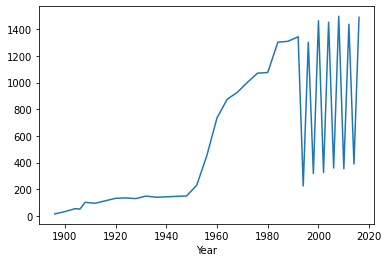

In [37]:
USA_medal.plot()

In [38]:
USA_medal = athelets_dataset[(athelets_dataset['NOC'] == 'USA') & (athelets_dataset['Medal'] == 'Gold') | (athelets_dataset['Medal'] == 'Silver') | (athelets_dataset['Medal'] == 'Bronze')]
CHN_medal = athelets_dataset[(athelets_dataset['NOC'] == 'CHN') & (athelets_dataset['Medal'] != 'nan')]
CHN_medal = CHN_medal[(CHN_medal['Medal'] == 'Gold') | (CHN_medal['Medal'] == 'Silver') | (CHN_medal['Medal'] == 'Bronze')]
CHN_medal = CHN_medal.groupby('Year')['Medal'].count()
CHN_medal = CHN_medal.reset_index()
CHN_medal

,Year,Medal
0,1984,74
1,1988,52
2,1992,81
3,1994,3
4,1996,106
5,1998,14
6,2000,79
7,2002,16
8,2004,94
9,2006,13


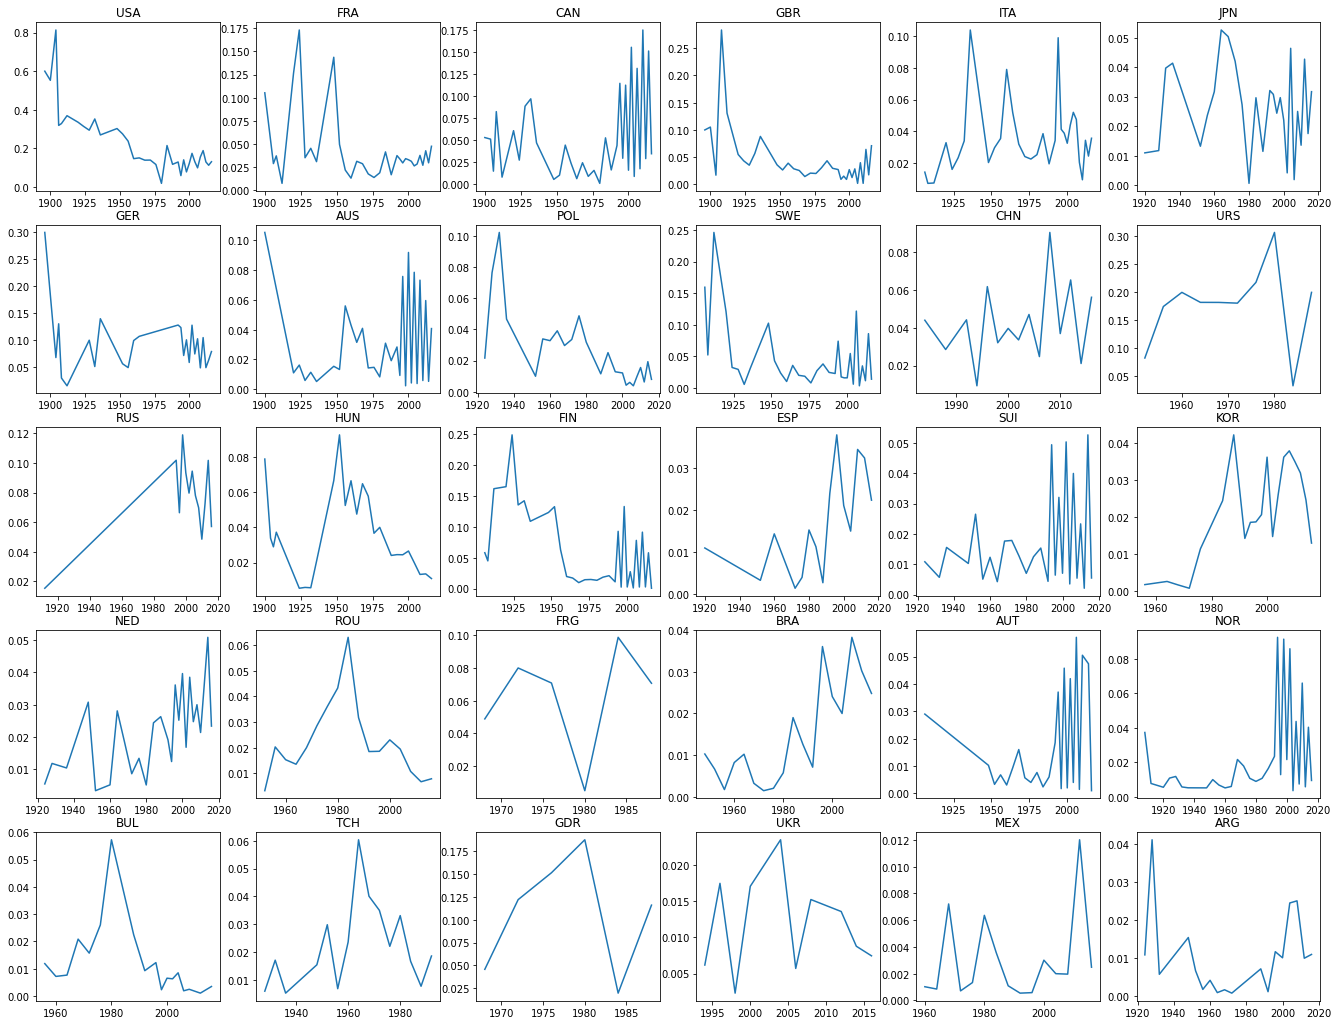

In [39]:
year_medal_total = athelets_dataset[athelets_dataset['Medal'] != 'nan']
year_medal_total = year_medal_total.groupby('Year')['Medal'].count()
year_medal_total = year_medal_total.reset_index()

plt.figure(figsize=(23,18))
for c in range(len(top_30_country)):
    p = []
    medal = athelets_dataset[(athelets_dataset['NOC'] == top_30_country[c]) & (athelets_dataset['Medal'] != 'nan')]
    medal = medal[(medal['Medal'] == 'Gold') | (medal['Medal'] == 'Silver') | (medal['Medal'] == 'Bronze')]
    medal = medal.groupby('Year')['Medal'].count()
    medal = medal.reset_index()
    for i in range(len(medal['Year'])):
        p.append(medal.iloc[i,1]/int(year_medal_total[year_medal_total['Year'] == medal.iloc[i,0]]['Medal']))
    medal['Percent'] = p
    plt.subplot(5,6,c+1)
    plt.plot(medal['Year'],medal['Percent'])
    plt.gca().set_title(top_30_country[c])

plt.show()


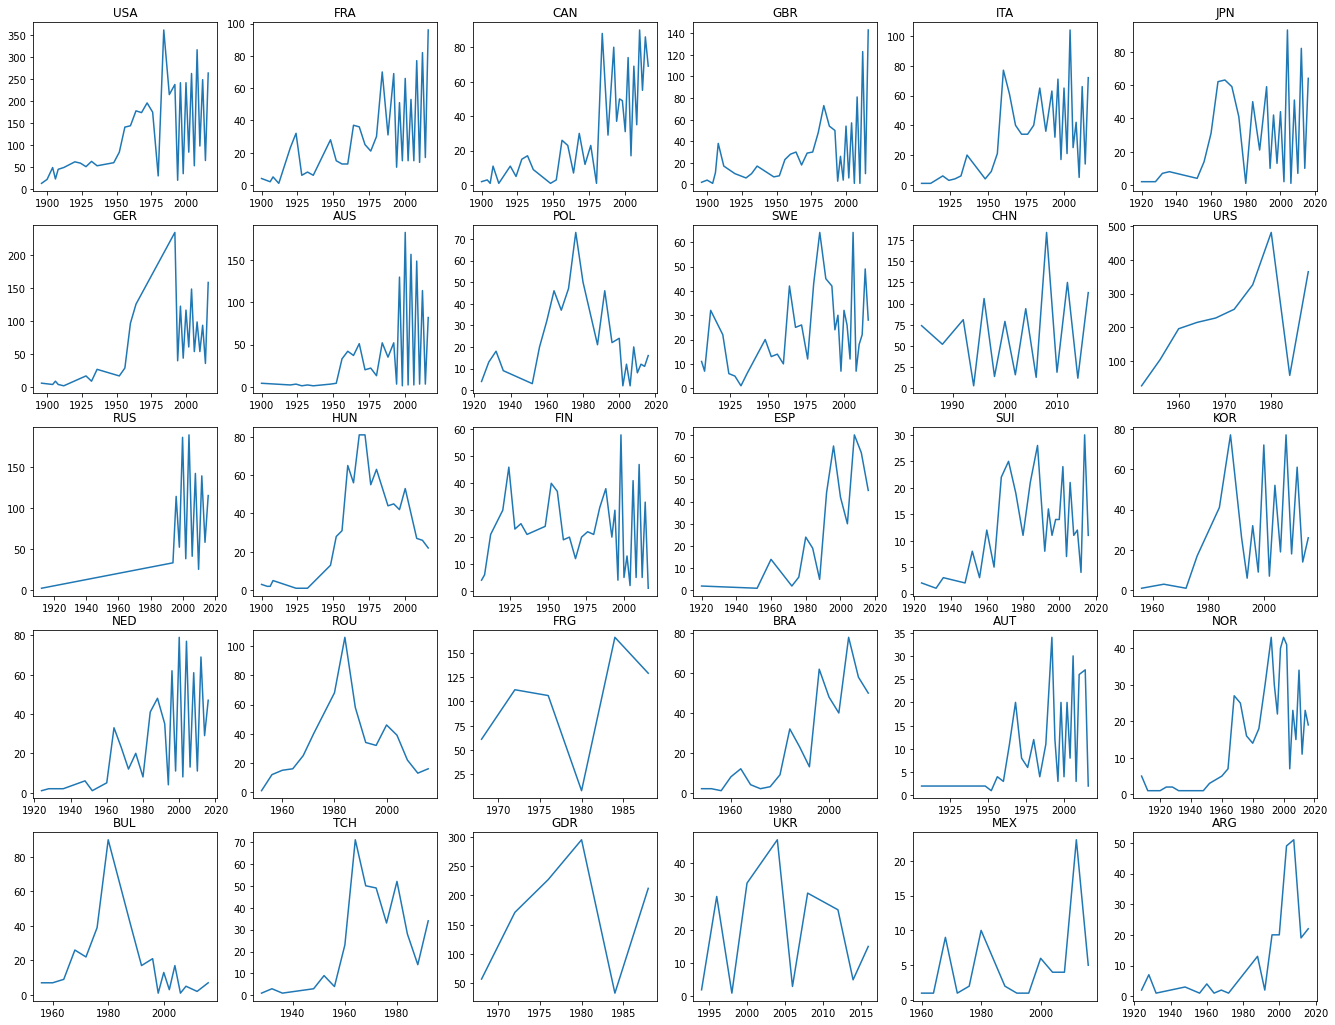

In [40]:
plt.figure(figsize=(23,18))
for c in range(len(top_30_country)):
    p = []
    medal = athelets_dataset[(athelets_dataset['NOC'] == top_30_country[c]) & (athelets_dataset['Medal'] != 'nan')]
    medal = medal[(medal['Medal'] == 'Gold') | (medal['Medal'] == 'Silver') | (medal['Medal'] == 'Bronze')]
    medal = medal.groupby('Year')['Medal'].count()
    medal = medal.reset_index()
    plt.subplot(5,6,c+1)
    plt.plot(medal['Year'],medal['Medal'])
    plt.gca().set_title(top_30_country[c])

plt.show()

[0.043969102792632206, 0.028461959496442254, 0.04416575790621592, 0.009259259259259259, 0.06173558532323821, 0.032036613272311214, 0.03963873557451079, 0.033542976939203356, 0.047, 0.024714828897338403, 0.09041769041769042, 0.036893203883495145, 0.06527415143603134, 0.021052631578947368, 0.05610724925521351]


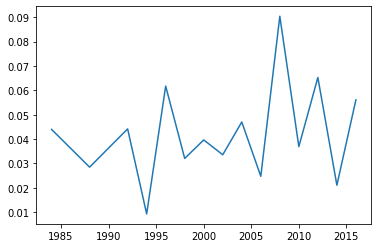

In [41]:
year_medal_total = athelets_dataset[athelets_dataset['Medal'] != 'nan']
year_medal_total = year_medal_total.groupby('Year')['Medal'].count()
year_medal_total = year_medal_total.reset_index()

#CHN_medal['percent'] = CHN_medal['Medal'] / year_medal_total['Medal']
p = []
for i in range(len(CHN_medal['Year'])):
    #print(CHN_medal.iloc[i,0])
    p.append(CHN_medal.iloc[i,1]/int(year_medal_total[year_medal_total['Year'] == CHN_medal.iloc[i,0]]['Medal']))
print(p)
CHN_medal['Percent'] = p
plt.plot(CHN_medal['Year'],CHN_medal['Percent'])


In [42]:
year_medal_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    35 non-null     int64
 1   Medal   35 non-null     int64
dtypes: int64(2)
memory usage: 688.0 bytes


In [43]:
CHN_medal.head(2)

,Year,Medal,Percent
0,1984,74,0.043969
1,1988,52,0.028462


In [44]:
athelets_dataset['Sport'].unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Athletics', 'Alpine Skiing', 'Weightlifting', 'Wrestling', 'Luge',
       'Rowing', 'Bobsleigh', 'Swimming', 'Football', 'Equestrianism',
       'Shooting', 'Taekwondo', 'Boxing', 'Fencing', 'Diving', 'Canoeing',
       'Handball', 'Water Polo', 'Tennis', 'Cycling', 'Hockey',
       'Figure Skating', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics',
       'Freestyle Skiing', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Golf',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton', 'Rugby',
       'Tug-Of-War', 'Art Competitions', 'Lacrosse', 'Motorboating'],
      dtype=object)

<AxesSubplot:xlabel='Year', ylabel='Height'>

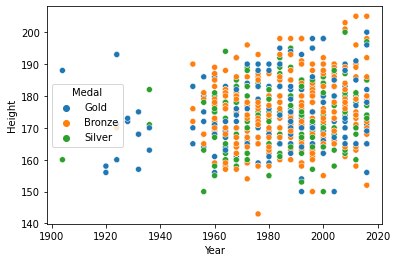

In [45]:
boxing_subdata = athelets_dataset[(athelets_dataset['Sport'] == 'Boxing') & (athelets_dataset['Medal'] != 'nan')]
boxing_subdata_M = boxing_subdata[boxing_subdata['Sex'] == 'M']
boxing_subdata_M_Gold = boxing_subdata_M[boxing_subdata_M['Medal'] == 'Gold']
boxing_subdata_M_Silver = boxing_subdata_M[boxing_subdata_M['Medal'] == 'Silver']
boxing_subdata_M_Bronze = boxing_subdata_M[boxing_subdata_M['Medal'] == 'Bronze']
sns.scatterplot(data = boxing_subdata_M, x='Year', y='Height', hue='Medal')

In [46]:
boxing_subdata_M

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
587,337,Mukhammad Kadyr Abdullayev,M,26.0,169.0,63.0,Uzbekistan,UZB,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Light-Welterweight,Gold
1162,646,Anibl Santiago Acevedo,M,21.0,176.0,67.0,Puerto Rico,PUR,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Welterweight,Bronze
1196,673,Abdel Hak Achik,M,29.0,165.0,54.0,Morocco,MAR,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Featherweight,Bronze
1198,674,Mohamed Abdelhak Achik,M,27.0,174.0,57.0,Morocco,MAR,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Bantamweight,Bronze
1288,723,Osmay Acosta Duarte,M,23.0,188.0,91.0,Cuba,CUB,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Heavyweight,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270438,135270,Zou Shiming,M,23.0,165.0,49.0,China,CHN,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Light-Flyweight,Bronze
270439,135270,Zou Shiming,M,27.0,165.0,49.0,China,CHN,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Light-Flyweight,Gold
270440,135270,Zou Shiming,M,31.0,165.0,49.0,China,CHN,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Flyweight,Gold
270770,135414,Andreas Zlow,M,22.0,175.0,61.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Lightweight,Gold


<AxesSubplot:xlabel='Height', ylabel='Weight'>

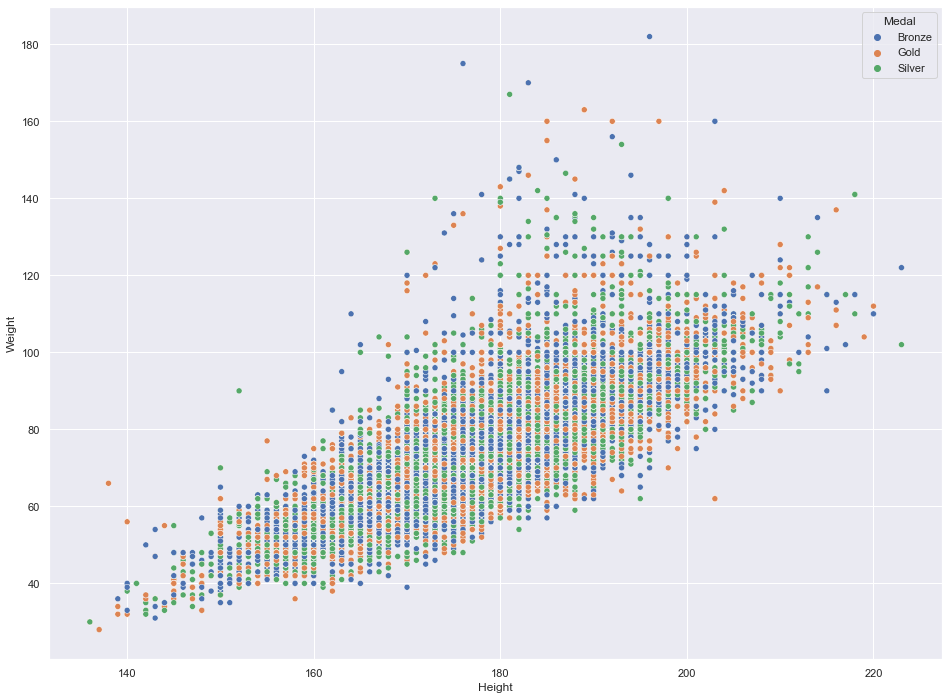

In [47]:
athelets_dataset_medal = athelets_dataset[athelets_dataset['Medal'] != 'nan']
sns.set(rc={'figure.figsize':(16,12)})
sns.scatterplot(data=athelets_dataset_medal,x='Height',y='Weight',hue='Medal')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

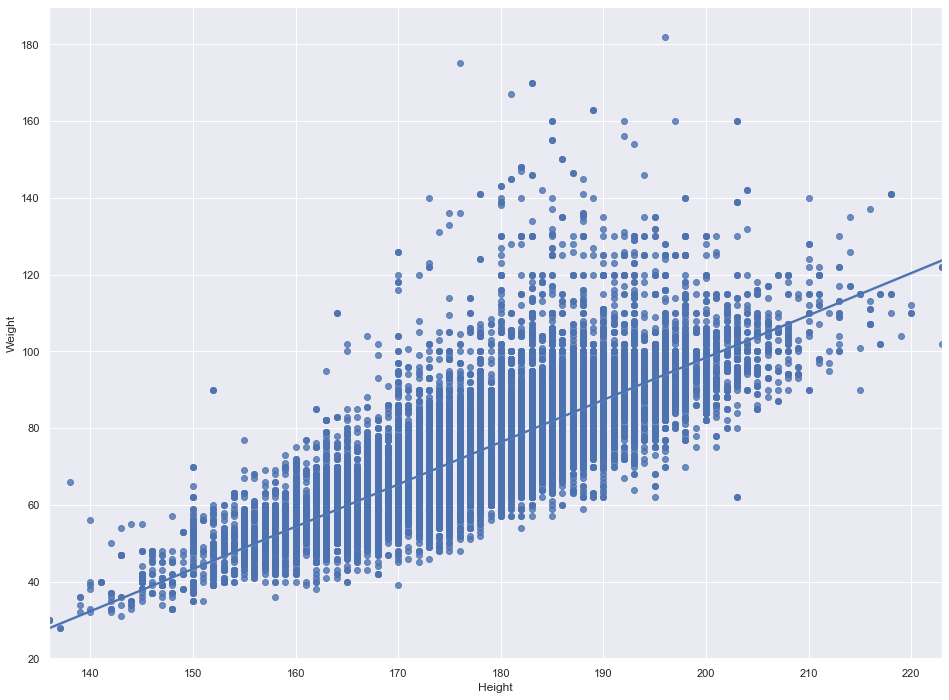

In [48]:
sns.regplot(x='Height',y='Weight',data=athelets_dataset_medal)

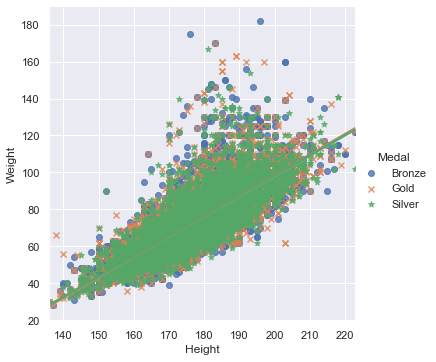

In [49]:
sns.set(rc={'figure.figsize':(16,12)})
sns.lmplot(x='Height',y='Weight',hue='Medal',data=athelets_dataset_medal,markers=['o','x','*'])

In [50]:
slope, intercept, r_value, p_value, std_err = stats.linregress(boxing_subdata_M['Height'],boxing_subdata_M['Weight'])
slope

1.2208730796290241

In [51]:
sport_items = athelets_dataset_medal['Sport'].unique()
sport_items
def sport_medal(sport):
    sport_medal = athelets_dataset_medal[athelets_dataset_medal['Sport'] == sport]
    return sport_medal

slope_height_weight_dict = {}
for i in sport_items:
    sport_m = sport_medal(i)
    slope, intercept, r_value, p_value, std_err = stats.linregress(sport_m['Height'],sport_m['Weight'])
    slope_height_weight_dict[i] = slope

slope_height_weight_pd = pd.DataFrame.from_dict(slope_height_weight_dict, orient ='index', columns=['Slope'])
slope_height_weight_pd.sort_values(by='Slope',ascending=False,inplace=True)
slope_height_weight_pd.reset_index(inplace=True)
slope_height_weight_pd.columns = ['Sport_item','Slope']
slope_height_weight_pd

,Sport_item,Slope
0,Weightlifting,2.057724
1,Wrestling,1.755246
2,Judo,1.666992
3,Alpine Skiing,1.323584
4,Athletics,1.307915
5,Rugby Sevens,1.289258
6,Bobsleigh,1.247167
7,Handball,1.232825
8,Skeleton,1.227344
9,Boxing,1.218667


In [52]:
art_medal = athelets_dataset_medal[athelets_dataset_medal['Sport'] == 'Art Competitions']
art_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
81616,41434,Charles Anthoine Gonnet,M,26.0,172.0,76.0,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Literature,Bronze
96760,48996,Adolf Hoch,M,38.0,176.0,75.0,Austria,AUT,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Architecture, Architect...",Gold


In [53]:
synchorinized_medal = athelets_dataset_medal[athelets_dataset_medal['Sport'] == 'Synchronized Swimming']
synchorinized_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4507,2575,Lisa Alexander,F,27.0,172.0,58.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Synchronized Swimming,Synchronized Swimming Women's Team,Silver
11534,6299,Yelena Yuryevna Azarova,F,27.0,165.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Synchronized Swimming,Synchronized Swimming Women's Team,Gold
11535,6299,Yelena Yuryevna Azarova,F,31.0,165.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Synchronized Swimming,Synchronized Swimming Women's Team,Gold
11794,6436,Kristen Elizabeth Babb-Sprague,F,23.0,178.0,58.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Synchronized Swimming,Synchronized Swimming Women's Solo,Gold
15482,8343,Alison Bartosik,F,21.0,172.0,64.0,United States,USA,2004 Summer,2004,Summer,Athina,Synchronized Swimming,Synchronized Swimming Women's Duet,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265958,133060,Yuko Yoneda,F,21.0,174.0,63.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Synchronized Swimming,Synchronized Swimming Women's Team,Silver
266087,133122,Kurumi Yoshida,F,24.0,167.0,57.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Synchronized Swimming,Synchronized Swimming Women's Team,Bronze
267789,133972,Kendra Zanotto,F,22.0,162.0,52.0,United States,USA,2004 Summer,2004,Summer,Athina,Synchronized Swimming,Synchronized Swimming Women's Team,Bronze
268538,134342,Zeng Zhen,F,22.0,170.0,61.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Synchronized Swimming,Synchronized Swimming Women's Team,Silver
